In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Questions to Investigate:

### 1. Age and Gender:

**A) Which age group has the highest number of bikers?**

**B) What is the average biking distence for the gender groups?**

**B) Bike pattern of diffrent gender groups across various times of the day?**



### 2. Time of the day,  day of the week, Season: Peak season, Peak Hour, National Holiday:

**A) When are most trips taken in terms of time of day, day of the week, or month of the year?**

**B) Busiest Season of the year**

**C) How long does the average trip take?**






### 3. User type 

**A) Who travles more days on average: subscriber or customer**

**B) More distence**

**C) Customer per age group**

**D) Subscriber per age group**

### 4. Busiest Station

**A) Top 05 beginning desitinaiton in terms of number**

**B) Top 05 end desitinaition in terms of number**


### 5. People Covering the largest distence

**A) Show relationship between gender, age and covered distence**

**B) Show relationship between customer type, and covered distence**



In [28]:
%store -r df
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,str_month_no,end_month_no,season,distance,start_hour,end_hour,duration_min,start_date,end_date,year
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,12,1,Winter,9.448761,16,15,1335.166667,31,01,2017
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,12,1,Winter,30.711442,15,13,1313.333333,31,01,2017
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,12,1,Winter,6.377721,14,2,726.716667,31,01,2017
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,...,12,1,Winter,15.151413,23,0,36.383333,31,01,2017
13,2170,2017-12-31 23:52:55.937,2018-01-01 00:29:06.924,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,...,12,1,Winter,15.151413,23,0,36.166667,31,01,2017


In [29]:
df.shape

(1007069, 29)

In [30]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,str_month_no,end_month_no,season,distance,start_hour,end_hour,duration_min,start_date,end_date,year
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,12,1,Winter,9.448761,16,15,1335.166667,31,01,2017
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,12,1,Winter,30.711442,15,13,1313.333333,31,01,2017


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007069 entries, 0 to 179123
Data columns (total 29 columns):
duration_sec               1007069 non-null int64
start_time                 1007069 non-null datetime64[ns]
end_time                   1007069 non-null datetime64[ns]
start_station_id           1007069 non-null int64
start_station_name         1007069 non-null object
start_station_latitude     1007069 non-null float64
start_station_longitude    1007069 non-null float64
end_station_id             1007069 non-null int64
end_station_name           1007069 non-null object
end_station_latitude       1007069 non-null float64
end_station_longitude      1007069 non-null float64
bike_id                    1007069 non-null int64
user_type                  1007069 non-null object
member_birth_year          1007069 non-null float64
member_gender              1007069 non-null object
Month-str                  1007069 non-null object
day                        1007069 non-null object
day_

### Time

In [32]:
df_time = df.drop(['start_time','end_time', 'age', 'start_station_id', 'start_station_name', 'end_station_name', 'start_station_name','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude','end_station_id','member_birth_year', 'duration_sec'], axis=1)

In [33]:
df_time.head()

,bike_id,user_type,member_gender,Month-str,day,day_type,str_month_no,end_month_no,season,distance,start_hour,end_hour,duration_min,start_date,end_date,year
0,96,Customer,Male,Dec,Sun,Weekend,12,1,Winter,9.448761,16,15,1335.166667,31,01,2017
1,88,Customer,Female,Dec,Sun,Weekend,12,1,Winter,30.711442,15,13,1313.333333,31,01,2017
4,3167,Subscriber,Female,Dec,Sun,Weekend,12,1,Winter,6.377721,14,2,726.716667,31,01,2017
12,2311,Subscriber,Male,Dec,Sun,Weekend,12,1,Winter,15.151413,23,0,36.383333,31,01,2017
13,3717,Subscriber,Male,Dec,Sun,Weekend,12,1,Winter,15.151413,23,0,36.166667,31,01,2017


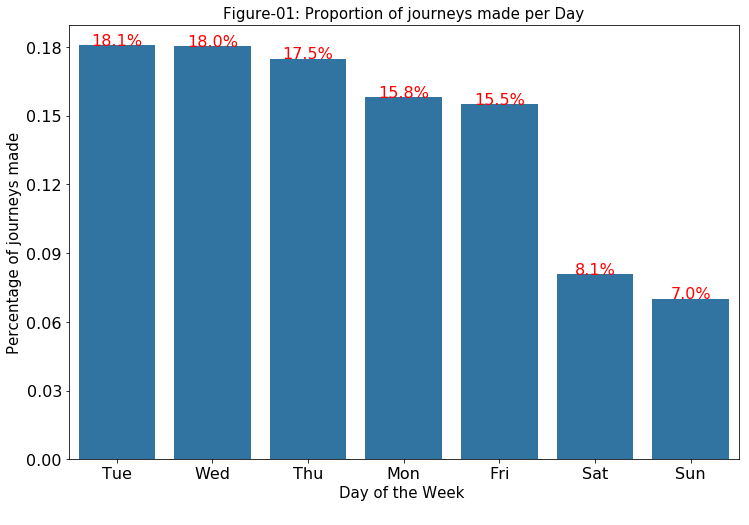

In [36]:
## Plot Proportion of journeys made per Day
plt.figure(figsize = [12, 8])
base_color = sns.color_palette()[1]
n_points = df_time['day'].value_counts().sum()
max_count = df_time['day'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['day'], color = base_color, order = df_time['day'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Day of the Week \n ",fontsize=15)
plt.ylabel("Percentage of journeys made",fontsize=15)
plt.title('Figure-01: Proportion of journeys made per Day',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['day'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

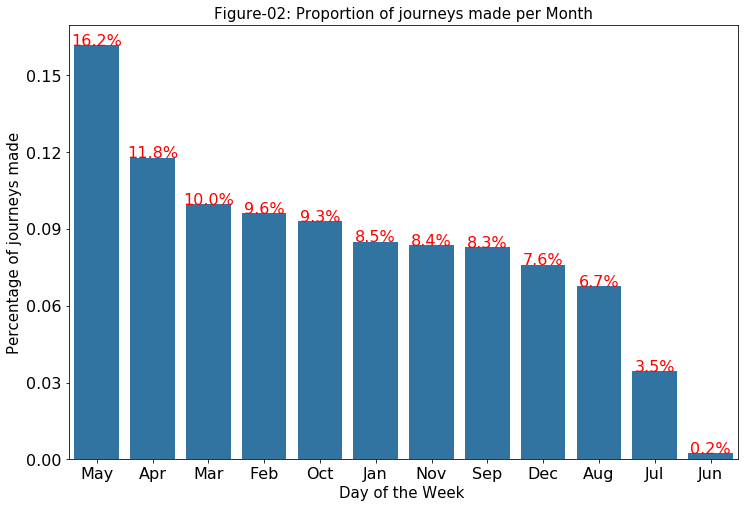

In [38]:
## Plot Proportion of journeys made per Day
plt.figure(figsize = [12, 8])
base_color = sns.color_palette()[1]
n_points = df_time['Month-str'].value_counts().sum()
max_count = df_time['Month-str'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['Month-str'], color = base_color, order = df_time['Month-str'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Day of the Week \n ",fontsize=15)
plt.ylabel("Percentage of journeys made",fontsize=15)
plt.title('Figure-02: Proportion of journeys made per Month',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['Month-str'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [65]:
#summer
df_weekday_summer = df.query('day_type == "Weekday" & season == "Summer"').groupby(['start_hour']).count().start_time.reset_index()
df_weekday_summer = df_weekday_summer.nlargest(24,'start_hour')

df_weekend_summer = df.query('day_type != "Weekday" & season == "Summer"').groupby(['start_hour']).count().start_time.reset_index()
df_weekend_summer = df_weekend_summer.nlargest(24,'start_hour')

#Autumn
df_weekday_autumn = df.query('day_type == "Weekday" & season == "Autumn"').groupby(['start_hour']).count().start_time.reset_index()
df_weekday_autumn = df_weekday_autumn.nlargest(24,'start_hour')

df_weekend_autumn = df.query('day_type != "Weekday" & season == "Autumn"').groupby(['start_hour']).count().start_time.reset_index()
df_weekend_autumn = df_weekend_autumn.nlargest(24,'start_hour')


#spring
df_weekday_spring = df.query('day_type == "Weekday" & season == "Spring"').groupby(['start_hour']).count().start_time.reset_index()
df_weekday_spring = df_weekday_spring.nlargest(24,'start_hour')

df_weekend_spring = df.query('day_type != "Weekday" & season == "Spring"').groupby(['start_hour']).count().start_time.reset_index()
df_weekend_spring = df_weekend_spring.nlargest(24,'start_hour')

#Winter
df_weekday_winter = df.query('day_type == "Weekday" & season == "Winter"').groupby(['start_hour']).count().start_time.reset_index()
df_weekday_winter = df_weekday_winter.nlargest(24,'start_hour')

df_weekend_winter = df.query('day_type != "Weekday" & season == "Winter"').groupby(['start_hour']).count().start_time.reset_index()
df_weekend_winter = df_weekend_autumn.nlargest(24,'start_hour')



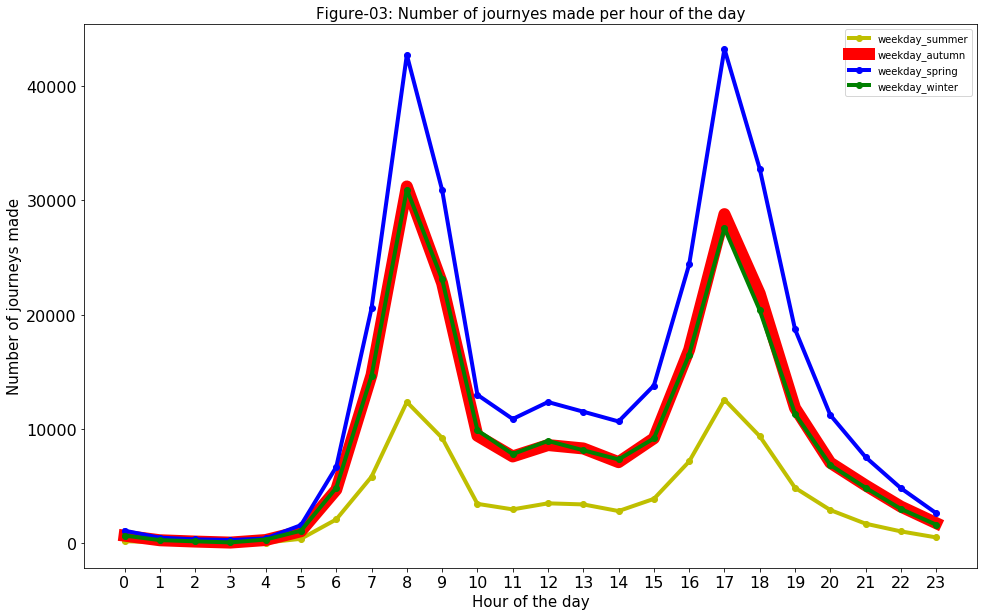

In [66]:
plt.figure(figsize = [16, 10])
sns.color_palette()
base_color = sns.color_palette()[0]
plt.ylabel("Number of journeys made",fontsize=15)
plt.xlabel("Hour of the day",fontsize=15)
plt.title('Figure-03: Number of journyes made per hour of the day',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

x_1=df_weekday_summer['start_hour']
y_1=df_weekday_summer['start_time']

x_3=df_weekday_autumn['start_hour']
y_3=df_weekday_autumn['start_time']


x_5=df_weekday_spring['start_hour']
y_5=df_weekday_spring['start_time']

x_7=df_weekday_winter['start_hour']
y_7=df_weekday_winter['start_time']

plt.plot(x_1, y_1, label='weekday_summer',linewidth=4.0,marker='o', linestyle='-', color='y')
plt.plot(x_3, y_3, label='weekday_autumn',linewidth=12.0,marker='o', linestyle='-', color='r')
plt.plot(x_5, y_5, label='weekday_spring',linewidth=4.0,marker='o', linestyle='-', color='b')
plt.plot(x_7, y_7, label='weekday_winter',linewidth=4.0,marker='o', linestyle='-', color='g')
plt.xticks(np.arange(min(x_1), max(x_1)+1, 1.0))
plt.legend()
plt.show()


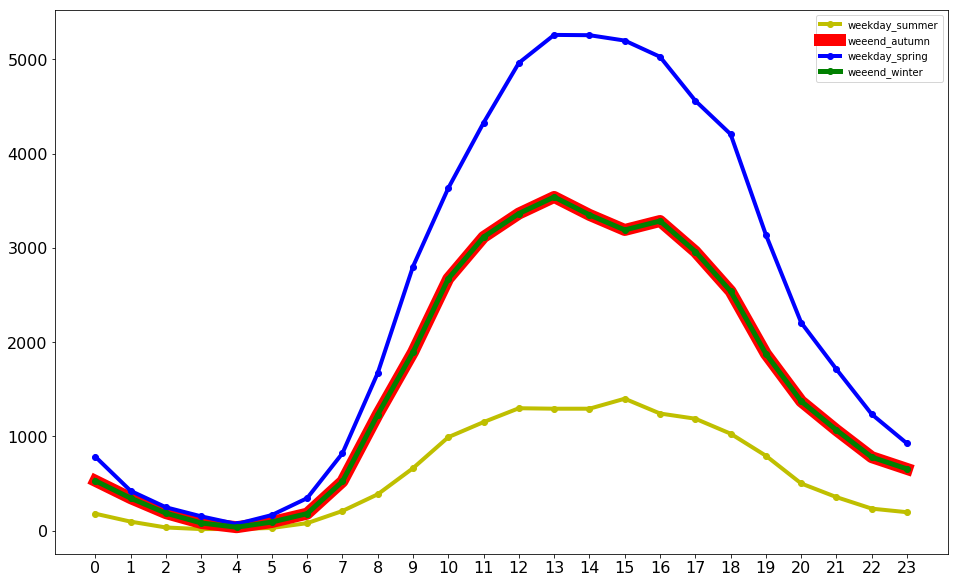

In [41]:
plt.figure(figsize = [16, 10])
sns.color_palette()
base_color = sns.color_palette()[0]

x_2 =df_weekend_summer['start_hour']
y_2 =df_weekend_summer['start_time']

x_4 =df_weekend_autumn['start_hour']
y_4 =df_weekend_autumn['start_time']


x_6 =df_weekend_spring['start_hour']
y_6 =df_weekend_spring['start_time']

x_8 =df_weekend_winter['start_hour']
y_8 =df_weekend_winter['start_time']

plt.plot(x_2, y_2, label='weekday_summer',linewidth=4.0,marker='o',linestyle='-', color='y')
plt.plot(x_4, y_4, label='weeend_autumn',linewidth=12.0,marker='o', linestyle='-', color='r')
plt.plot(x_6, y_6, label='weekday_spring',linewidth=4.0,marker='o', linestyle='-', color='b')
plt.plot(x_8, y_8, label='weeend_winter',linewidth=5.0,marker='o', linestyle='-', color='g')

plt.xticks(np.arange(min(x_2), max(x_2)+1, 1.0))


plt.legend()
plt.show()

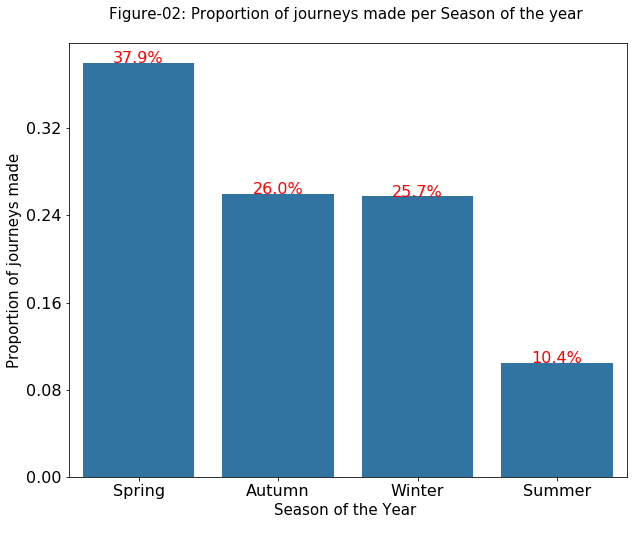

In [67]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [10, 8])
base_color = sns.color_palette()[1]
n_points = df_time['season'].value_counts().sum()
max_count = df_time['season'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['season'], color = base_color, order = df_time['season'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Season of the Year \n",fontsize=15)
plt.ylabel("Proportion of journeys made",fontsize=15)
plt.title('Figure-02: Proportion of journeys made per Season of the year \n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['season'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [44]:
df.groupby(['day_type']).mean().distance

day_type
Weekday    16.354726
Weekend    16.136144
Name: distance, dtype: float64

In [45]:
df.groupby(['day_type']).mean().duration_min

day_type
Weekday    11.978987
Weekend    16.206515
Name: duration_min, dtype: float64

**Note:**

**1. Most Journeys are made during the middle of the week Tuesday- Thursday and the least during the weekend.**

**2. Average Distance covered during the weekend is almost similar to the weekdays although the number journeys are much higher during the weekdays.**

**3. Average durations of the journyes during the weekend is higher than the journys during the weekdays.**


In [46]:
df_gender_duration = df.groupby(['member_gender', 'day_type']).mean().duration_min.reset_index()
df_weekday_distance = df.groupby(['member_gender','day_type']).mean().distance.reset_index()
df_gender_journey = pd.merge(df_weekday_distance, df_gender_duration)
df_gender_journey

,member_gender,day_type,distance,duration_min
0,Female,Weekday,17.192246,13.978821
1,Female,Weekend,16.921841,19.578270
2,Male,Weekday,16.083816,11.338306
3,Male,Weekend,15.816395,14.911957
4,Other,Weekday,17.604907,14.609518
5,Other,Weekend,17.063700,17.214776


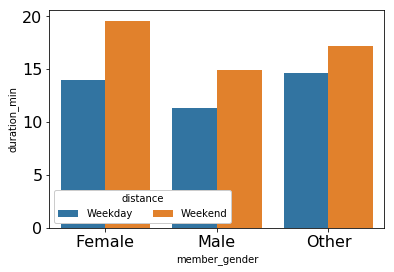

In [47]:
ax = sns.barplot( data = df_gender_journey, x = 'member_gender', y = 'duration_min', hue = 'day_type')
ax.legend(loc = 3, ncol = 2, framealpha = 1, title = 'distance')


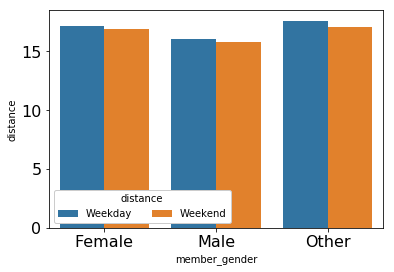

In [48]:
ax = sns.barplot( data = df_gender_journey, x = 'member_gender', y = 'distance', hue = 'day_type')
ax.legend(loc = 3, ncol = 2, framealpha = 1, title = 'distance')

In [49]:
df_season_duration = df.groupby(['season', 'day_type']).mean().duration_min.reset_index()
df_season_duration

,season,day_type,duration_min
0,Autumn,Weekday,12.319741
1,Autumn,Weekend,16.746493
2,Spring,Weekday,11.666905
3,Spring,Weekend,15.251293
4,Summer,Weekday,13.422534
5,Summer,Weekend,21.652329
6,Winter,Weekday,11.497618
7,Winter,Weekend,15.079130


3. User type

A) What is apercentage of user and subscriber?

B)Who travles more days on average: subscriber or customer

B) More distance and duration

C) Customer & Subscriber  per age group

D) Customer & Subscriber  per gender group

E) Pattern for Travel during the day


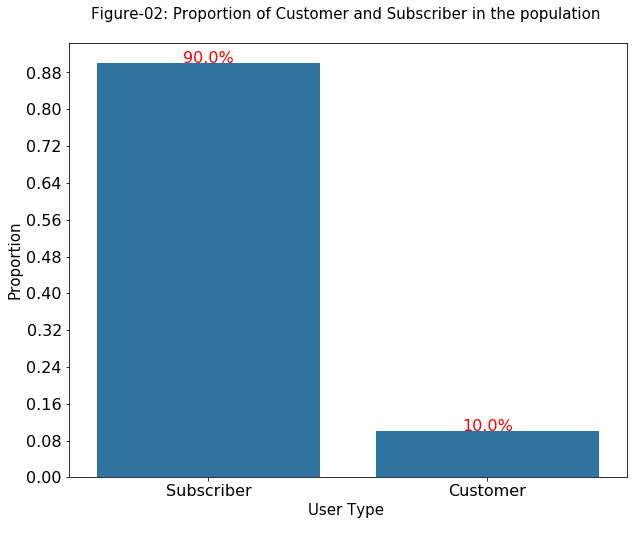

In [50]:
# code for the pie chart seen above
## Plot the percentage of movie released per quarter
plt.figure(figsize = [10, 8])
base_color = sns.color_palette()[1]
n_points = df['user_type'].value_counts().sum()
max_count = df['user_type'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = df['user_type'], color = base_color, order = df['user_type'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("User Type \n",fontsize=15)
plt.ylabel("Proportion",fontsize=15)
plt.title('Figure-02: Proportion of Customer and Subscriber in the population \n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [51]:
df_sub = df.query('user_type == "Subscriber"')
df_cus = df.query('user_type == "Customer"')

In [63]:
df_usertype_duration = df.groupby(['user_type', 'day_type']).mean().duration_min.reset_index()
df_usertype_distance = df.groupby(['user_type','day_type']).mean().distance.reset_index()
df_usertype_journey = pd.merge(df_usertype_duration, df_usertype_distance)
df_usertype_journey

,user_type,day_type,duration_min,distance
0,Customer,Weekday,25.388264,19.271440
1,Customer,Weekend,31.223877,18.609916
2,Subscriber,Weekday,10.807515,16.099913
3,Subscriber,Weekend,12.203588,15.476752


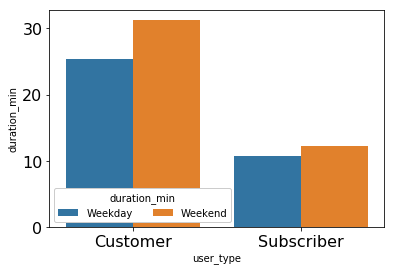

In [64]:
ax = sns.barplot( data = df_usertype_journey, x = 'user_type', y = 'duration_min', hue = 'day_type')
ax.legend(loc = 3, ncol = 2, framealpha = 1, title = 'duration_min')

In [ ]:
ax = sns.barplot( data = df_usertype_journey, x = 'user_type', y = 'distance', hue = 'day_type')
ax.legend(loc = 3, ncol = 2, framealpha = 1, title = 'distance_kilometer')

In [ ]:
df_sub['member_gender'].value_counts()

In [ ]:
fig, ax = plt.subplots(ncols = 1, figsize = [13,8])
ct_counts = df.groupby(['user_type', 'member_gender']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')
sns.heatmap(ct_counts,annot = True, fmt = 'd')

### Age

In [ ]:
#Finding the minimum and the maximum of age
df['age'].min(), df['age'].max() 

### Some of the ages are clearly wrong. Hence, we limit our analysis on the portion of the population with that falls  within the significant category.

In [ ]:
# median age of the population 
df['age'].median()

In [ ]:
df.describe().age

In [ ]:
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
plt.subplot(1, 2, 1)
# left plot: violin plot
sns.violinplot(data = df, x = 'user_type', y = 'age', color = base_color)

plt.subplot(1, 2, 2)
# left plot: violin plot
sns.boxplot(data = df, x = 'user_type', y = 'age', color = base_color)

In [ ]:
# Calculaitng 99% percentile
ninetynine_percentile = np.percentile(df.age, 97)
ninetynine_percentile

**Note: We can see that 97% of the people are 59 years or younger. Hence, we exclude the population with age higher than 59 years from our analysis for convenience.**

In [ ]:
df_under61= df.query('age < 60')
df_under61.head(2)

In [ ]:
# Creates bin edges for runtime- this will exclude the 31 movies with 0 runtime as the bin edge starts at 0
bin_edges = [17, 19, 29, 39, 49, 60]
# Creates bin names based on the runtime
bin_names = ['Teenagers (18-19 yrs)','Twenties (20-29 yrs)','Thirties (30-39 yrs)', 'Forties (40-49 yrs)', 'Fifties (50-59 yrs)']

In [ ]:
# Creates decade_levels column based on the year of release
df_under61['age_cat'] = pd.cut(df_under61['age'], bin_edges, labels = bin_names)
df_under61.head()

In [ ]:
df_under61 = df_under61.drop(['bike_id','duration_sec','start_date', 'end_date','str_month_no','end_month_no', 'year','start_time','end_time', 'start_station_id', 'start_station_name', 'end_station_name', 'start_station_name','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude','end_station_id','member_birth_year'], axis=1)

In [ ]:
df_under61.head()

In [ ]:
df_under61.query('age == 59').head(3)

In [ ]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[1]
n_points = df_under61['member_gender'].value_counts().sum()
max_count = df_under61['member_gender'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_under61, x = df_under61['member_gender'], color = base_color, order = df_under61['member_gender'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Season of the Year \n",fontsize=15)
plt.ylabel("Proportion of journeys made",fontsize=15)
plt.title('Figure-02: Proportion of journeys made per Season of the year \n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_under61['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [ ]:
df_under61_male = df_under61.query('member_gender == "Male"')
df_under61_female = df_under61.query('member_gender == "Feale"')

In [ ]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[1]
n_points = df_under61_male['age_cat'].value_counts().sum()
max_count = df_under61_male['age_cat'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_under61, x = df_under61['age_cat'], color = base_color, order = df_under61_male['age_cat'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Season of the Year \n",fontsize=15)
plt.ylabel("Proportion of journeys made",fontsize=15)
plt.title('Figure-02: Proportion of journeys made per Season of the year \n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_under61_male['age_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [ ]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[1]
n_points = df_under61['age_cat'].value_counts().sum()
max_count = df_under61['age_cat'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_under61, x = df_under61['age_cat'], color = base_color, order = df_under61['age_cat'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Season of the Year \n",fontsize=15)
plt.ylabel("Proportion of journeys made",fontsize=15)
plt.title('Figure-02: Proportion of journeys made per Season of the year \n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_under61['age_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [ ]:
df_under61['member_gender'].value_counts()

In [ ]:
fig, ax = plt.subplots(ncols = 1, figsize = [13,8])
ct_counts = df_under61.groupby(['user_type', 'age_cat']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'age_cat', columns = 'user_type', values = 'count')
sns.heatmap(ct_counts,annot = True, fmt = 'd')

In [ ]:
fig, ax = plt.subplots(ncols = 1, figsize = [13,8])
ct_counts = df_under61.groupby(['member_gender', 'user_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'user_type', columns = 'member_gender', values = 'count')
sns.heatmap(ct_counts,annot = True, fmt = 'd')

In [ ]:
# Calculaitng 99% percentile distance
ninetynine_percentile_distance = np.percentile(df_under61.distance, 99.5)
ninetynine_percentile

In [ ]:
# Calculaitng 99% percentile duration
ninetynine_percentile_duration = np.percentile(df_under61.duration_min, 99)
ninetynine_percentile_duration

In [ ]:
df_under61_2 = df_under61.query('duration_min < 52.1 & distance <52')

In [ ]:
df_under61_2.describe().distance

In [ ]:
# left plot: violin plot
plt.figure(figsize = [17, 8])
sns.violinplot(data = df_under61_2, y = 'distance', x = 'age_cat',inner = 'quartile', color = base_color)

In [ ]:
# left plot: violin plot
plt.figure(figsize = [17, 8])
sns.violinplot(data = df_under61_2, y = 'distance', x = 'member_gender',inner = 'quartile', color = base_color)

In [ ]:
# left plot: violin plot
plt.figure(figsize = [17, 8])
sns.violinplot(data = df_under61_2, y = 'duration_min', x = 'age_cat',inner = 'quartile', color = base_color)

In [ ]:
# left plot: violin plot
plt.figure(figsize = [17, 8])
sns.violinplot(data = df_under61_2, y = 'duration_min', x = 'member_gender',inner = 'quartile', color = base_color)